*****
# Text readability on Github is distorted. Please download notebook.
*****

# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
import numpy as np

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


### <span style="color:blue"> Significance of race on resume callbacks in US job market. </span>

$ \color{darkblue} {\bf \large \textrm {Primary Exploratiry Data Analysis } } $

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

In [6]:
data.groupby(['race','call'])['id'].describe().transpose()

race       b          w     
call     0.0  1.0   0.0  1.0
count   2278  157  2200  235
unique   287   13   285   11
top        b    b     b    b
freq    1565  117  1500  182

In [7]:
data.groupby(['race','call']).describe().transpose()

race                           b                          w             
call                         0.0          1.0           0.0          1.0
adid         count   2278.000000   157.000000   2200.000000   235.000000
             mean     645.269531   746.210205    643.729553   727.123413
             std      390.198212   354.689972    393.642242   330.659698
             min        1.000000     5.000000      1.000000    40.000000
             25%      294.000000   381.000000    282.000000   440.500000
             50%      635.000000   823.000000    633.000000   720.000000
             75%      973.750000  1029.000000    979.500000   974.000000
             max     1344.000000  1338.000000   1344.000000  1342.000000
bankreal     count   2278.000000   157.000000   2200.000000   235.000000
             mean       0.086918     0.057325      0.084545     0.089362
             std        0.281775     0.233206      0.278267     0.285874
             min        0.000000     0.000000      0.000000     0.000000
             25%        0.000000     0.000000      0.000000     0.000000
             50%        0.000000     0.000000      0.000000     0.000000
             75%        0.000000     0.000000      0.000000     0.000000
             max        1.000000     1.000000      1.000000     1.000000
branch_emp   count    310.000000    19.000000    299.000000    30.000000
             mean     761.697388   652.947388    774.773193   562.500000
             std     1677.525391  1510.848877   1681.756714  1517.619019
             min        0.000000    50.000000      0.000000     0.000000
             25%       92.250000   202.000000     96.500000   112.500000
             50%      187.500000   230.000000    190.000000   227.500000
             75%      500.000000   415.000000    500.000000   386.000000
             max    12208.000000  6829.000000  12208.000000  8504.000000
branch_sales count    285.000000    19.000000    276.000000    28.000000
             mean     202.018951   106.526306    205.237305   105.496437
             std      924.625244   232.075165    937.307678   277.533203
             min        0.000000     6.100000      0.000000     7.500000
             25%       13.000000    15.700000     13.000000    13.850000
             50%       35.099998    26.000000     35.099998    18.000000
...                          ...          ...           ...          ...
transcom     std        0.164018     0.256071      0.169369     0.192324
             min        0.000000     0.000000      0.000000     0.000000
             25%        0.000000     0.000000      0.000000     0.000000
             50%        0.000000     0.000000      0.000000     0.000000
             75%        0.000000     0.000000      0.000000     0.000000
             max        1.000000     1.000000      1.000000     1.000000
volunteer    count   2278.000000   157.000000   2200.000000   235.000000
             mean       0.412643     0.439490      0.408182     0.412766
             std        0.492418     0.497913      0.491609     0.493382
             min        0.000000     0.000000      0.000000     0.000000
             25%        0.000000     0.000000      0.000000     0.000000
             50%        0.000000     0.000000      0.000000     0.000000
             75%        1.000000     1.000000      1.000000     1.000000
             max        1.000000     1.000000      1.000000     1.000000
workinschool count   2278.000000   157.000000   2200.000000   235.000000
             mean       0.565408     0.496815      0.561818     0.523404
             std        0.495812     0.501590      0.496277     0.500518
             min        0.000000     0.000000      0.000000     0.000000
             25%        0.000000     0.000000      0.000000     0.000000
             50%        1.000000     0.000000      1.000000     1.000000
             75%        1.000000     1.000000      1.000000     1.000000
             max        1.000000     1.000000      1.00000

In [8]:
data.groupby(['race','call']).describe().unstack().transpose()

race                               b            w
                   call                          
adid         count 0.0   2278.000000  2200.000000
                   1.0    157.000000   235.000000
             mean  0.0    645.269531   643.729553
                   1.0    746.210205   727.123413
             std   0.0    390.198212   393.642242
                   1.0    354.689972   330.659698
             min   0.0      1.000000     1.000000
                   1.0      5.000000    40.000000
             25%   0.0    294.000000   282.000000
                   1.0    381.000000   440.500000
             50%   0.0    635.000000   633.000000
                   1.0    823.000000   720.000000
             75%   0.0    973.750000   979.500000
                   1.0   1029.000000   974.000000
             max   0.0   1344.000000  1344.000000
                   1.0   1338.000000  1342.000000
bankreal     count 0.0   2278.000000  2200.000000
                   1.0    157.000000   235.000000
             mean  0.0      0.086918     0.084545
                   1.0      0.057325     0.089362
             std   0.0      0.281775     0.278267
                   1.0      0.233206     0.285874
             min   0.0      0.000000     0.000000
                   1.0      0.000000     0.000000
             25%   0.0      0.000000     0.000000
                   1.0      0.000000     0.000000
             50%   0.0      0.000000     0.000000
                   1.0      0.000000     0.000000
             75%   0.0      0.000000     0.000000
                   1.0      0.000000     0.000000
...                              ...          ...
workinschool mean  0.0      0.565408     0.561818
                   1.0      0.496815     0.523404
             std   0.0      0.495812     0.496277
                   1.0      0.501590     0.500518
             min   0.0      0.000000     0.000000
                   1.0      0.000000     0.000000
             25%   0.0      0.000000     0.000000
                   1.0      0.000000     0.000000
             50%   0.0      1.000000     1.000000
                   1.0      0.000000     1.000000
             75%   0.0      1.000000     1.000000
                   1.0      1.000000     1.000000
             max   0.0      1.000000     1.000000
                   1.0      1.000000     1.000000
yearsexp     count 0.0   2278.000000  2200.000000
                   1.0    157.000000   235.000000
             mean  0.0      7.745391     7.757273
                   1.0      9.050955     8.782979
             std   0.0      4.935879     5.045693
                   1.0      5.876721     5.305187
             min   0.0      1.000000     1.000000
                   1.0      1.000000     1.000000
             25%   0.0      5.000000     5.000000
                   1.0      5.000000     5.000000
             50%   0.0      6.000000     6.000000
                   1.0      7.000000     7.000000
             75%   0.0      9.000000     9.000000
                   1.0     13.000000    11.000000
             max   0.0     44.000000    26.000000
                   1.0     26.000000    26.000000

[864 rows x 2 columns]

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?

*********
*********
<ol> $ \Large \color{darkblue} {\textrm {1. Appropriate test is z-test comparing two proportions} } $ </ol>
<ul><ul>

<li> $ \color{darkblue} {\textrm {Two-Sample z-test since comparing two independent groups } } $
<li> $ \color{darkblue} {\textrm {Central Limit Theorem does apply } } $ <ul></ul>


*********
*********
<ol> $ \Large \color{darkblue} {\textrm {2. Null and Alternate hypothesis} } $ </ol>
<ul><ul>
<li> $ \color{darkgreen} {\large {\textrm {Null Hypothesis, H} \substack{0}:} } \\ $
<ul> $ \color{darkblue}  {\textrm {Resume callback for black-sounding names  =  Resume callback for white-sounding names} } \\ $ </ul>
<li> $ \color{darkred} {\large {\textrm {Null Hypothesis, H} \substack{a}:} } \\ $
<ul> $ \color{darkblue} {\textrm {Resume callback for black-sounding names  } \neq \textrm {  Resume callback for white-sounding names} \\ } \\ $ </ul>
<li> $ \color{darkblue} {\textrm {Confidence Level = 95} \%\; \implies {\large \alpha} \textrm { = 0.05 = 5} \%} $ 
<li> $ \color{darkblue} {\textrm {Critical propability = }
\begin{align} 1\;-\;{\frac {\large \alpha}{2}} \end{align} 
\textrm { = 0.975}
} $
<ul></ul>

<div class="span5 alert alert-success">
<p>Your solution to Q3 here</p>
</div>

   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

$ \color{darkblue} {
\textrm{For a 95} \%\; \textrm {confidence level, }  \bf {z{-}table} \textrm { indicates }
{\bf {z{-}score\;of\;1.96}\textrm { standard diviation corresponding to  } {Z_{\alpha/2} = 97.5} \% \;. }
\\
{\underline {\textrm{Margin of Error:}}
\\
\textrm{ME = }\; Z_{\alpha/2} * SE. } 
} $

$\color{darkblue} {\textrm {Where SE  = } \large {\sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{n_1} + \frac{\hat{p}_2(1-\hat{p}_2)}{n_2}} } } \\ $
<ul></ul>
$ \color{darkblue} {\textrm{Confidence Interval = } |\hat{p}_1 - \hat{p}_2 |\pm \textrm{ME}} $   

*******
$ \color{darkblue} {\large {\textrm{ Calculations}  } }$

In [24]:
n1 = len(data.call[data.race=='b'])
p1 = data.call[data.race=='b'].sum() / len(data.call[data.race=='b'])
n2 = len(data.call[data.race=='w'])
p2 = data.call[data.race=='w'].sum() / len(data.call[data.race=='w'])
SE = np.sqrt(((p1*(1-p1))/n1) + ((p2*(1-p2))/n2))
ME = 1.96 * SE
CI = [np.abs(p1-p2) - ME, np.abs(p1-p2) + ME]
z_stat = np.abs(data.call[data.race=='w'].mean() - data.call[data.race=='b'].mean() ) / SE
mean_diff = data.call[data.race=='w'].mean() - data.call[data.race=='b'].mean()
p_value = stats.norm.sf(np.abs(z_stat))*2

In [25]:
stat_measures = pd.DataFrame(np.transpose(np.round([p1, p2, SE, z_stat, ME, CI[0], CI[1], p_value], 6)), \
                     index = ['p1', 'p2', 'Standard Error', \
                              'z-statistics', 'Margin of Error', \
                              'Confidence Interval_lo', \
                              'Confidence IntervalI_hi', 'p-value'],
                    columns = ['Results'])
stat_measures

,Results
p1,0.064476
p2,0.096509
Standard Error,0.007783
z-statistics,4.115551
Margin of Error,0.015255
Confidence Interval_lo,0.016777
Confidence IntervalI_hi,0.047288
p-value,0.000039


$ \color{darkblue} {\large \textrm {Central Tendency Statistics } } $

In [27]:
b_call = data.call[data.race=='b']
w_call = data.call[data.race=='w']
CLT_calls_race = pd.DataFrame(np.transpose([np.round([data.call.mean(), \
                                                      data.call.median(), \
                                                      data.call.mode()], 4), \
                                            np.round([b_call.mean(), \
                                                      b_call.median(), \
                                                      b_call.mode()], 4), \
                                            np.round([w_call.mean(), \
                                                      w_call.median(),\
                                                      w_call.mode()], 4), \
                                            np.round([b_call.mean() - \
                                                      w_call.mean(), \
                                                      b_call.median() - \
                                                      w_call.median(), \
                                                      b_call.mode() - \
                                                      w_call.mode()],4)]),\
                              index = ['Mean','Median','Mode'], \
                              columns = ['Calls','B-Calls', 'W-Calls', r'$\Delta$(B, W)'])
CLT_calls_race

,Calls,B-Calls,W-Calls,"$\Delta$(B, W)"
Mean,0.0805,0.0645,0.0965,-0.032
Median,0.0000,0.0000,0.0000,0.000
Mode,0.0000,0.0000,0.0000,0.000


$ \color{darkblue} {\large \textrm {Bootstrap } } $

In [125]:
sampleSize = len(data.call)

# initialize list
bootstrap_means = []
# Plot sample mean distribution
for i in range(10000):
    bootstrap_means.append(np.mean(data.call.sample(sampleSize, replace=True)))
    
# Compute the 95% confidence interval: conf_int
conf_Interval = (np.percentile(bootstrap_means, [2.5, 97.5]))
print(conf_Interval)

[0.07289527 0.08829569]


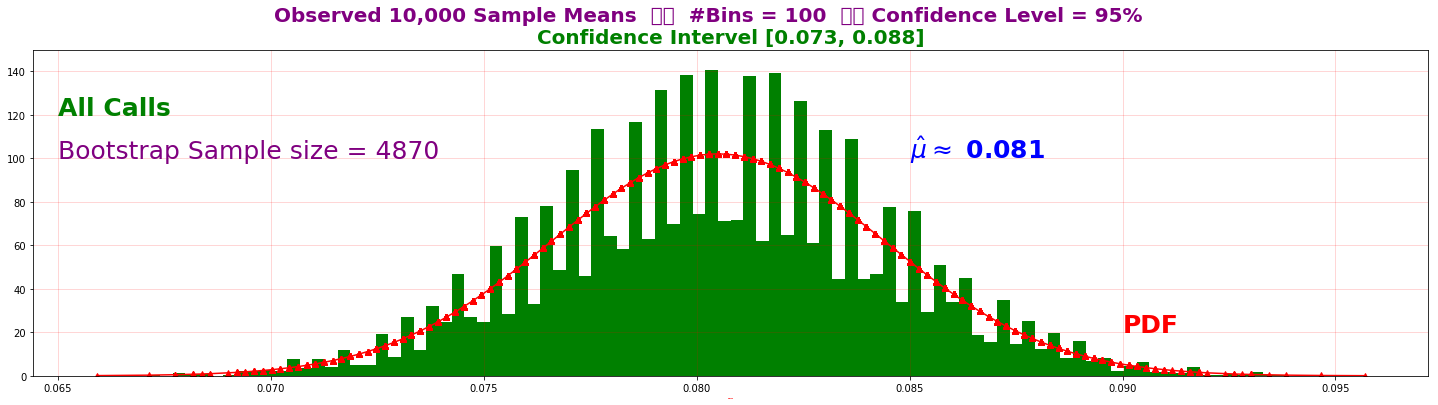

In [128]:
sorted_means = sorted(bootstrap_means)
s_mean = np.mean(sorted_means)
# fit normal distribution probability density function (pdf)
fit_pdf = stats.norm.pdf(sorted_means, s_mean, np.std(sorted_means))
bin_s = 100
# Bootstrap sampling to estimate call-back mean
_ = plt.figure(figsize = (25, 6))
_ = plt.suptitle('Observed 10,000 Sample Means  \t\t  #Bins = %d  \t\t Confidence Level = 95%s\n' \
                 % (bin_s, '%'), \
                 fontweight = 'bold', color = 'purple', size = 20)

_ = plt.hist(bootstrap_means, density=True, color = 'g', bins = bin_s)
_ = plt.plot(sorted_means,fit_pdf,'r-^')            # add pdf of data to plot
_ = plt.text(0.065, 120, 'All Calls', size=25, color='g', fontweight = 'bold')
_ = plt.text(0.065, 100, 'Bootstrap Sample size = %d' % sampleSize, size=25, color='purple')
_ = plt.text(0.085, 100, r'$\hat\mu\approx$ %.3f' % s_mean, size=25, color='b', fontweight = 'bold')
_ = plt.text(0.09, 20, 'PDF', size=25, color='r', fontweight = 'bold')
_ = plt.ylim([0,150])
_ = plt.title('Confidence Intervel [%.3f, %.3f]' \
              % (conf_Interval[0], conf_Interval[1]), \
              color = 'g', fontweight = 'bold', size = 20)
_ = plt.xlabel('Mean', size = 2, color = 'r', fontweight = 'bold')
_ = plt.grid(color='r', alpha = 0.2)

In [55]:
sampleSize = len(data.call)

# initialize list
bootstrap_means = []
# Plot sample mean distribution
for i in range(5000):
    bootstrap_means.append(np.mean(data.call[data.race=='b'].sample(sampleSize, replace=True)))
    bootstrap_means.append(np.mean(data.call[data.race=='w'].sample(sampleSize, replace=True)))
# Compute the 95% confidence interval: conf_int
conf_Interval = (np.percentile(bootstrap_means, [2.5, 97.5]))
print(conf_Interval)

[0.05893224 0.10328542]


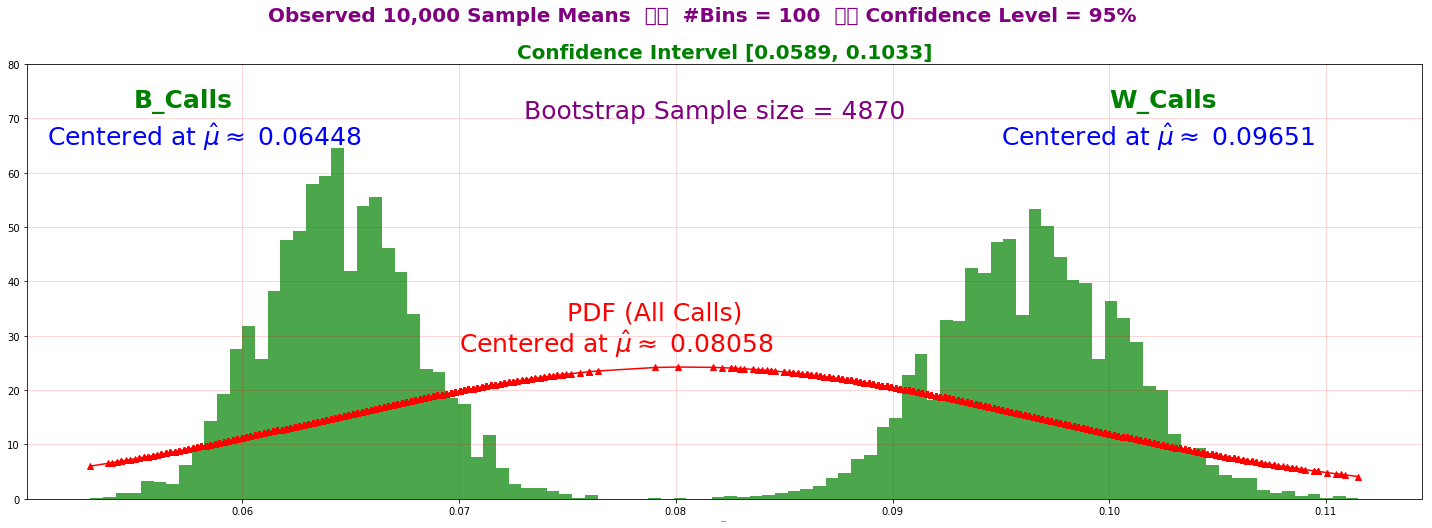

In [123]:
sorted_means = sorted(bootstrap_means)
# fit normal distribution probability density function (pdf)
fit_pdf = stats.norm.pdf(sorted_means, np.mean(sorted_means), np.std(sorted_means))
bin_s = 100
# Bootstrap sampling to estimate call-back mean
_ = plt.figure(figsize = (25, 8))
_ = plt.suptitle('Observed 10,000 Sample Means  \t\t  #Bins = %d  \t\t Confidence Level = 95%s' \
                 % (bin_s, '%'), \
                 fontweight = 'bold', color = 'purple', size = 20)

_ = plt.hist(bootstrap_means, density=True, color = 'g', bins = bin_s, alpha = 0.7)
_ = plt.plot(sorted_means,fit_pdf,'r-^')            # add pdf of data to plot
_ = plt.text(0.075, 33, 'PDF (All Calls)', size=25, color='r')
_ = plt.text(0.070, 27, r'Centered at $\hat\mu\approx$ %.5f' % s_mean, size=25, color='r')
_ = plt.text(0.055, 72, 'B_Calls', size=25, color='g', fontweight = 'bold')
_ = plt.text(0.051, 65, r'Centered at $\hat\mu\approx$ %.5f' % b_call.mean(), size=25, color='b')
_ = plt.text(0.100, 72, 'W_Calls', size=25, color='g', fontweight = 'bold')
_ = plt.text(0.095, 65, r'Centered at $\hat\mu\approx$ %.5f' % w_call.mean(), size=25, color='b')
_ = plt.text(0.073, 70, 'Bootstrap Sample size = %d' % sampleSize, size=25, color='purple')
_ = plt.ylim([0,80])
_ = plt.title('Confidence Intervel [%.4f, %.4f]' \
              % (conf_Interval[0], conf_Interval[1]), \
              color = 'g', fontweight = 'bold', size = 20)
_ = plt.xlabel('Mean', size = 2, color = 'r', fontweight = 'bold')
_ = plt.grid(color='r', alpha = 0.2)

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>


   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

*********
*********
<ol> $ \Large \color{darkblue} {\textrm {4. Write a story describing the statistical significance in the context}
\\
\textrm {of the original problem.} } $ </ol>
<ul><ul>
$ \large \color{darkblue} {\textrm {Bar plots below, summarize larger number of resumes  with black-sounding }
\\
\textrm {names receive less call-backs than white-sounding names. }
\\ 
\textrm {Statistical analysis also support the significance of call-back inequality. }
\\
\textrm {The test statistics with very low p-value clearly lead to rejection of }
\\
\textrm {null-hypothesis ( assuming equal call-backs regardless of race ). } } $

In [129]:
Callbacks = data.groupby(['race','call'])['id'].count().unstack()

call   0.0  1.0
race           
b     2278  157
w     2200  235


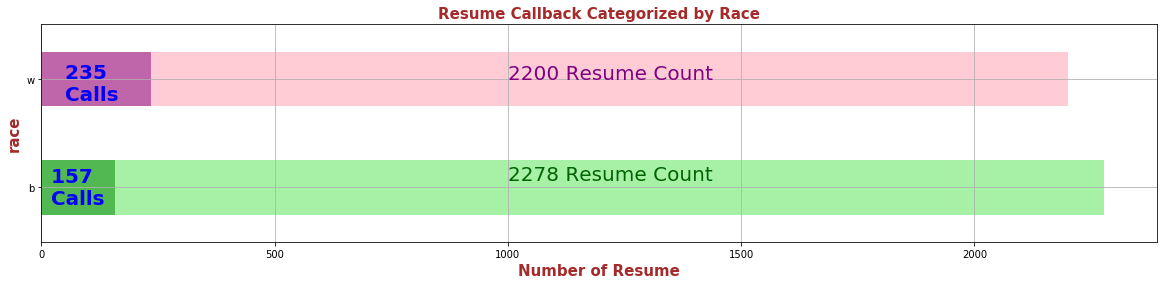

In [269]:
_ = plt.figure(figsize = (20, 4))
_ = plt.title('Resume Callback Categorized by Race', size = 15, \
              color = 'brown', fontweight = 'bold')
_ = plt.ylabel('Race', size = 15, color = 'brown', fontweight = 'bold')
_ = plt.xlabel('Number of Resume', size = 15, color = 'brown', fontweight = 'bold')
print(Callbacks)
_ = Callbacks[0].plot('barh', color = ('lightgreen', 'pink'), alpha = 0.8, grid = True)
_ = plt.text(50, .8, '%d \nCalls' % Callbacks[1][1], size=20, color='b', fontweight = 'bold')
_ = plt.text(1000, 1, '%d Resume Count' % Callbacks[0][1], size=20, color='purple')
_ = plt.text(20, -0.15, '%d \nCalls' % Callbacks[1][0], size=20, color='b', fontweight = 'bold')
_ = plt.text(1000, 0.07, '%d Resume Count' % Callbacks[0][0], size=20, color='darkgreen')
_ = Callbacks[1].plot('barh', color = ('green', 'purple'), alpha = 0.5, grid = True)
plt.show()

In [273]:
# Summary of callbacks
b_summary = np.round([Callbacks.iloc[0,1], Callbacks.iloc[0,1] / Callbacks.iloc[:,1].sum(), \
                      Callbacks.iloc[0,1] / Callbacks.iloc[:,1].sum() * 100, \
             Callbacks.iloc[0,0], (Callbacks.iloc[0,1] / Callbacks.iloc[0,0]), \
             (Callbacks.iloc[0,1] / Callbacks.iloc[0,0] *100), \
             (Callbacks.iloc[0,0] / Callbacks.iloc[:,0].sum()), \
             (Callbacks.iloc[0,0] / Callbacks.iloc[:,0].sum() *100) ] , 6)
w_summary = np.round([Callbacks.iloc[1,1], Callbacks.iloc[1,1] / Callbacks.iloc[:,1].sum(), \
                      Callbacks.iloc[1,1] / Callbacks.iloc[:,1].sum() * 100, \
             Callbacks.iloc[1,0], (Callbacks.iloc[1,1] / Callbacks.iloc[1,0]), \
             (Callbacks.iloc[1,1] / Callbacks.iloc[1,0] *100), \
             (Callbacks.iloc[1,1] / Callbacks.iloc[:,0].sum()), \
             (Callbacks.iloc[1,1] / Callbacks.iloc[:,0].sum() *100) ],6)

In [274]:
Summary = pd.DataFrame(np.transpose([b_summary, w_summary, b_summary - w_summary]), \
                       index = ['Calls', 'Calls / Total Calls', 'Calls / Total Calls (%)', \
                                'Resume #', 'Calls / Resume Count', 'Calls / Resume Count  (%)', \
                                'Calls / Total Resume Count  (4478)', 'Call / Total Resume Count  (%)'],
                       columns = ['B', 'W', r'$\Delta (B,W)$'])
Summary.style.clear()

*****
$ \color{darkblue} {\large \textrm {Summary Table} } $ 

In [276]:
Summary

,B,W,"$\Delta (B,W)$"
Calls,157.000000,235.000000,-78.000000
Calls / Total Calls,0.400510,0.599490,-0.198980
Calls / Total Calls (%),40.051020,59.948980,-19.897960
Resume #,2278.000000,2200.000000,78.000000
Calls / Resume Count,0.068920,0.106818,-0.037898
Calls / Resume Count (%),6.892011,10.681818,-3.789807
Calls / Total Resume Count (4478),0.508709,0.052479,0.456230
Call / Total Resume Count (%),50.870925,5.247879,45.623046


*********
*********
<ol> $ \Large \color{darkblue} {\textrm {5. Does your analysis mean that race/name is the most important }
\\
\textrm {factor in callback success? Why or why not? }
\\
\textrm {If not, how would you amend your analysis?} } $ </ol>
<ul><ul>
$ \large \color{darkblue} {\textrm {This analysis represents partial results, it has been only based on the race,  }
\\
\textrm {which is one of the factors affecting the overall call-backs.  }
\\ 
\textrm {For a more generalized and complete conclusion, a different approach }
\\
\textrm {would be required to include other relevant features for a more accurate }
\\
\textrm {analysis. }
\\
\textrm {However, if only race classification were to be analyzed, then based on this  } 
\\
\textrm {analysis, there is evidence that resume call-backs are significantly affected }
\\
\textrm {by how names are associated with race. }} $
